# Occupancy Analysis Report

This notebook analyzes and visualizes time intervals when the house is likely unoccupied, based on gaps in SmartThings activity (e.g., switch, motion) longer than 1 hour.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('unoccupied_intervals.csv')

# Convert gap from seconds to hours for better readability
df['gap_hours'] = df['gap'] / 3600

# Display the first few rows
df.head()

,start_time,end_time,gap,gap_hours
0,2022-10-09 22:40:01+00:00,2022-10-10 06:28:30+00:00,28109.0,7.808056
1,2022-10-10 07:26:44+00:00,2022-10-10 14:37:06+00:00,25822.0,7.172778
2,2022-10-10 15:22:10+00:00,2022-10-10 16:22:31+00:00,3621.0,1.005833
3,2022-10-10 17:05:37+00:00,2022-10-10 18:23:16+00:00,4659.0,1.294167
4,2022-10-10 18:23:44+00:00,2022-10-10 21:08:54+00:00,9910.0,2.752778


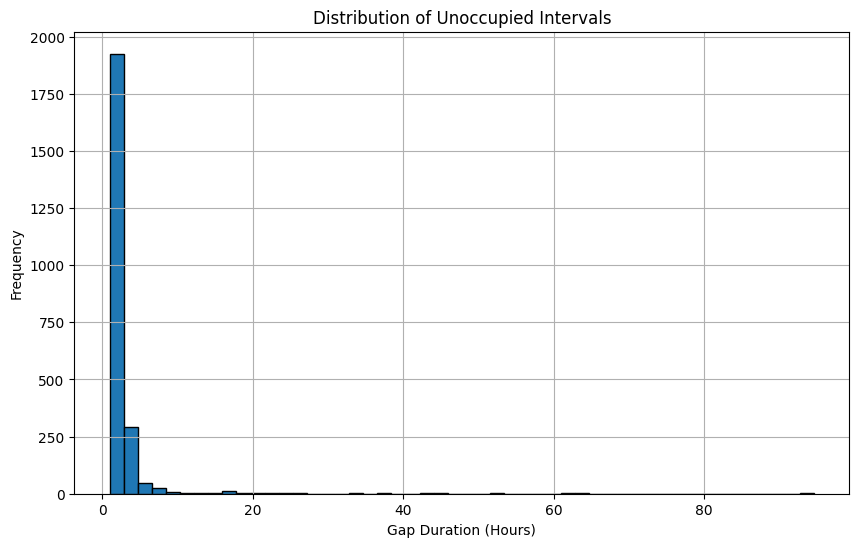

In [2]:
# Plot a histogram of gap durations
plt.figure(figsize=(10, 6))
plt.hist(df['gap_hours'], bins=50, edgecolor='black')
plt.xlabel('Gap Duration (Hours)')
plt.ylabel('Frequency')
plt.title('Distribution of Unoccupied Intervals')
plt.grid(True)

# Save the plot
plt.savefig('unoccupied_intervals_histogram.png')
plt.show()

## Analysis
- **Total Intervals**: 2338 intervals where no SmartThings activity (switch/motion) was detected for over 1 hour.
- **Gap Durations**:
  - Shortest gaps are just over 1 hour (e.g., 3621 seconds ≈ 1 hour).
  - Longest gaps are several hours (e.g., 28109 seconds ≈ 7.8 hours, likely overnight).
- **Patterns**:
  - Many gaps occur overnight (e.g., 22:40 to 06:28) or during the day (e.g., 07:26 to 14:37), possibly corresponding to sleep or being away at work/school.
  - The histogram shows the distribution of gap lengths, helping identify typical absence durations.
